In [1]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd
from tqdm import tqdm
from alexnet import alexnet
WIDTH=80
IMG_SIZE=WIDTH
HEIGHT=80
EPOCHS=30
LR=1e-3
MODEL_NAME='FYP17-{}{}.model'.format(LR,'FYPV10')
print('done')

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
done


In [2]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from tflearn.layers.normalization import batch_normalization

import tensorflow as tf
tf.reset_default_graph()

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input') 

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = batch_normalization (convnet)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = batch_normalization (convnet)
convnet = dropout(convnet, 0.7)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = batch_normalization (convnet)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = batch_normalization (convnet)
convnet = dropout(convnet, 0.7)

convnet = fully_connected(convnet, 512, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 6, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='C:\Tensorboard_logs\FYP17_myway\log')

In [3]:
hm_data = 10
for i in range(EPOCHS):
    for i in range(1,hm_data+1):
        train_data = np.load('training_data_v1.npy')

        train = train_data[:-100]
        test = train_data[-100:]

        X = np.array([i[0] for i in train]).reshape(-1,WIDTH,HEIGHT,1)
        Y = [i[2] for i in train]

        test_x = np.array([i[0] for i in test]).reshape(-1,WIDTH,HEIGHT,1)
        test_y = [i[2] for i in test]

        model.fit({'input': X}, {'targets': Y}, n_epoch=1, validation_set=({'input': test_x}, {'targets': test_y}), 
            snapshot_step=10000, show_metric=True, run_id=MODEL_NAME)
        
        #tensorboard --logdir=foo:C:/Tensorboard_logs/FYP17/log

        model.save(MODEL_NAME)

Training Step: 6119  | total loss: 0.07333 | time: 1.092s
| Adam | epoch: 180 | loss: 0.07333 - acc: 0.9849 -- iter: 2112/2152
Training Step: 6120  | total loss: 0.07152 | time: 2.131s
| Adam | epoch: 180 | loss: 0.07152 - acc: 0.9833 | val_loss: 2.10347 - val_acc: 0.6300 -- iter: 2152/2152
--
INFO:tensorflow:C:\Users\William Jiang\Documents\FYP17_tensorflow_demo\FYP17-0.001FYPV10.model is not in all_model_checkpoint_paths. Manually adding it.


KeyboardInterrupt: 

In [4]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

model loaded!


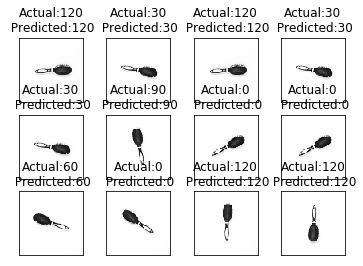

In [60]:
import matplotlib.pyplot as plt
IMG_SIZE=WIDTH
# if you already have some saved:
test_data = np.load('training_data_v1.npy')

fig=plt.figure()

for num,data in enumerate(test_data[0:12]):
    # cat: [1,0]
    # dog: [0,1]
    
    img_num = data[2]
    img_data = data[0]
    y = fig.add_subplot(3,4,num+1)
    #plt.subplots_adjust(wspace=1,hspace=0.5)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    model_out = model.predict([data])[0]
    str_label=np.argmax(model_out)*30
    actual_angle=np.argmax(img_num)*30
    title='Actual:{}\n Predicted:{}'.format(actual_angle,str_label)
    
    y.imshow(orig,cmap='gray')
    plt.title(title)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

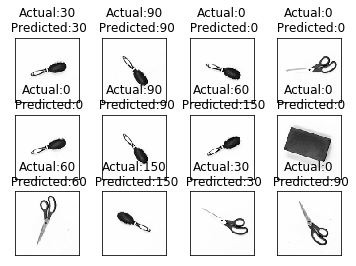

In [61]:
fig=plt.figure()
for num,data in enumerate(test[0:12]):
    # cat: [1,0]
    # dog: [0,1]
    
    img_num = data[2]
    img_data = data[0]
    y = fig.add_subplot(3,4,num+1)
    #plt.subplots_adjust(wspace=1,hspace=0.5)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    model_out = model.predict([data])[0]
    str_label=np.argmax(model_out)*30
    actual_angle=np.argmax(img_num)*30
    title='Actual:{}\n Predicted:{}'.format(actual_angle,str_label)
    
    y.imshow(orig,cmap='gray')
    plt.title(title)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()


In [57]:
img_num

array([1, 0, 0, 0, 0, 0])

array([[[254],
        [254],
        [254],
        ..., 
        [254],
        [254],
        [254]],

       [[254],
        [254],
        [254],
        ..., 
        [254],
        [253],
        [253]],

       [[254],
        [254],
        [254],
        ..., 
        [253],
        [253],
        [253]],

       ..., 
       [[254],
        [254],
        [253],
        ..., 
        [252],
        [252],
        [252]],

       [[253],
        [253],
        [253],
        ..., 
        [252],
        [252],
        [252]],

       [[253],
        [253],
        [253],
        ..., 
        [252],
        [252],
        [252]]], dtype=uint8)